In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
from scipy import stats
from scipy.stats import poisson
from scipy.stats import norm

### Problem 1

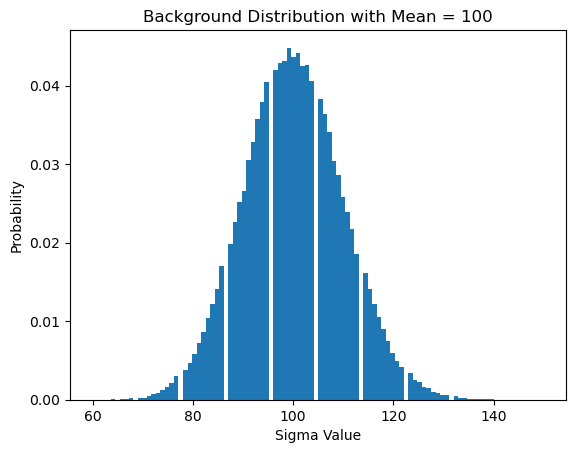

In [3]:
fig,ax = plt.subplots(1,1)
background = poisson.rvs(100,size=200000)
plt.hist(background,bins = 100,density = True)
plt.xlabel('Sigma Value')
plt.ylabel('Probability')
plt.title('Background Distribution with Mean = 100')
plt.show()

This is the background distribution of our data. We can now determine the 5σ threshold as we've always done.

In [4]:
#5 sigma threshold
prob = norm.cdf(5)
sig5 = poisson.ppf(prob,mu=100)
sig5

154.0

### Problem 2

We have the 5 sigma threshold, now we need to see where the 8-30 sigma range lies.

In [5]:
prob8 = norm.cdf(8)
sig8 = poisson.ppf(prob8,mu=100)

prob30 = norm.cdf(30)
sig30 = poisson.ppf(prob30,mu=100)

print('The signal will lie somewhere in ' +str(sig8)+ ' to ' + str(sig30) + ' range')

The signal will lie somewhere in 190.0 to inf range


In [6]:
signal = 375
sigma = norm.isf(poisson.sf(signal,mu=100))
sigma

21.05181365776992

So the signal strengh of 375 corresponds to ~21 sigma. Let's now inject this into the background distribution by reshaping the the signal size.

In [7]:
background = poisson.rvs(mu = 100,size = 1000000)
signal = poisson.rvs(375,size=500000)

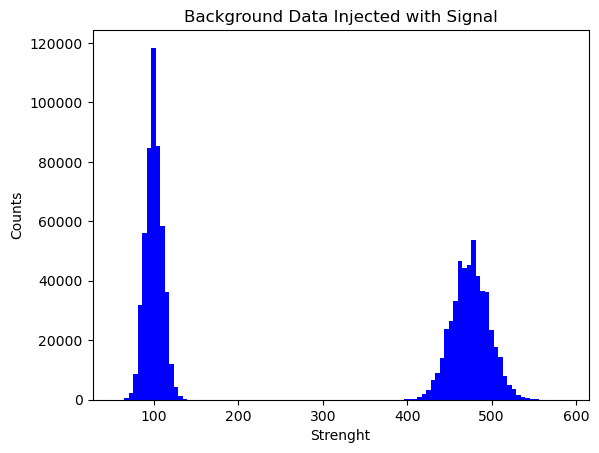

In [8]:
size_difference = len(background) - len(signal)
new_signal = np.append(signal,values=np.zeros(size_difference))
injected_data = background + new_signal
fig,ax = plt.subplots(1,1)
ax.hist(injected_data,bins = 100,color='blue')
ax.set_xlabel('Strenght')
ax.set_ylabel('Counts')
ax.set_title('Background Data Injected with Signal')
plt.show()

This histogram shows all of the data including the signal data. We can see the background data centered around 100 and the signal with strength of around 475. This also shows what happens to the signal strength when the injection process takes place; the background is literally added to the signal, so strength of 100 is added to signal strenght of 375 which is why we see a signal strength of 475.

Also, the observed signal is relatively symmetric about the strength = 475. This can be seen easier with a semilog plot. However, there is bias. This is because the background data must add to the total data, not subtract. So, the mean of the signal strength is always higher in the injected data rather than the original data.

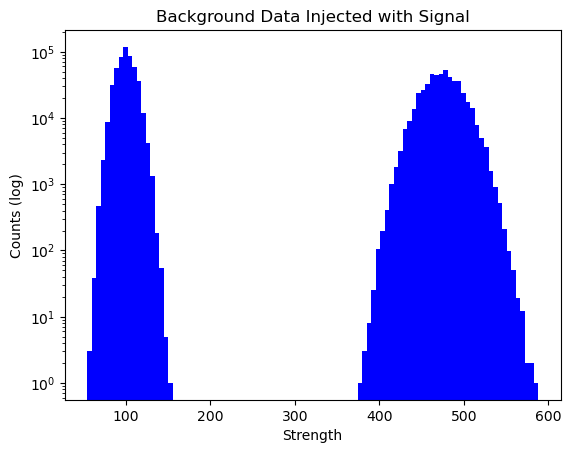

In [9]:
fig,ax = plt.subplots(1,1)
ax.hist(injected_data,bins = 100,color='blue')
ax.set_yscale('log')
ax.set_xlabel('Strength')
ax.set_ylabel('Counts (log)')
ax.set_title('Background Data Injected with Signal')
plt.show()

### Problem 3

A signal strength of 600 corresponds to a sigma value of ~34

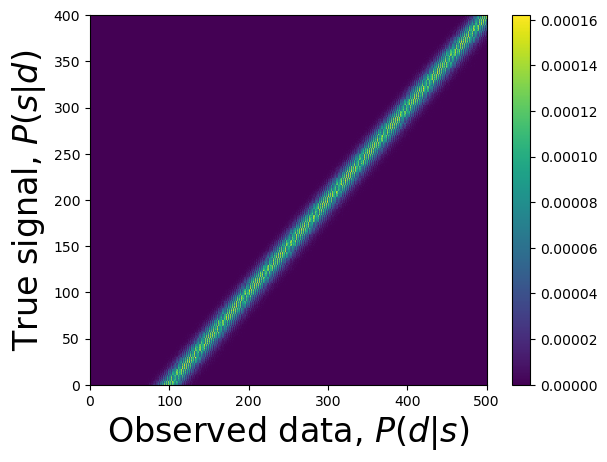

In [10]:
bkgd = poisson.rvs(mu = 100, size = 10000000)
signal = np.random.uniform(0,600,10000000)

data = bkgd + signal

signaledges = np.linspace(0,600,1200)
dataedges = np.linspace(-7,500,700)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T,shading='auto')
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.xlim([0,500])
plt.ylim([0,400])
plt.colorbar()

Similar to HW5, we will need to see how the plot looks for certain data. The injected signal power used in problem 2 is 375

In [11]:
data_range1 = []
length = len(data)
for i in range(length):
    if signal[i] <= 375.09 and signal[i] >= 375:    #true signal = 10
        data_range1.append(data[i])
np.mean(data_range1)

474.93576963415194

The mean of the background data is 100 and the signal that we determined before was 375, so when we added the background data, the signal was also shifted, as expected.

Now, if we reverse the problem and instead analyze the True signals given an observed data point. In this case I will choose observed data = 300

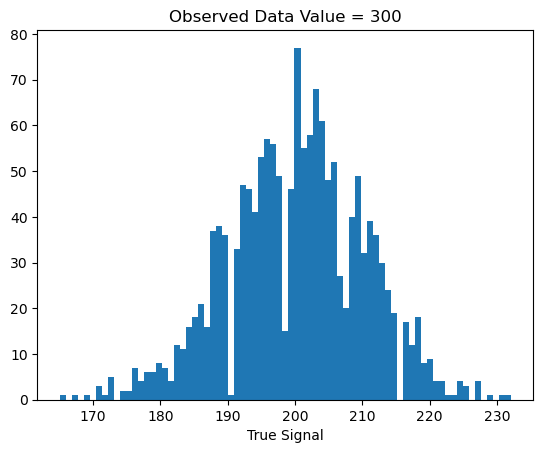

In [13]:
length = len(data)
data_range2 = []
for i in range(length):
    if data[i] <= 300.09 and data[i] >= 300:     #observed data = 300
        data_range2.append(signal[i])
plt.hist(data_range2,bins = 75)
plt.xlabel('True Signal')
plt.title('Observed Data Value = 300')
plt.show()

Now, we will find the 1σ uncertainty on the true signal strength. We can see from the above plot that the mean true signal is about 200 and the distribution looks pretty symmetric about this point. This makes the analysis easier because we can approximate that half of the probability will be on each side of the mean (much like a gaussian).

In [25]:
print('mean is '+ str(np.mean(data_range2)))
print('with standard Deviation: ' + str(np.std(data_range2)))

mean is 200.12133195863314
with standard Deviation: 10.076971517786424


so, the 1σ uncertainty on the true signal strength is 10.08

As discussed before, the true signal strength is symmetric about the mean and it is not biased. This is because poisson distributions with high enough means can be approximated into gaussians. 